In [1]:
# LIBRARIES

import numpy as np
print('numpy: '+np.version.full_version)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib
print('matplotlib: '+matplotlib.__version__)
from matplotlib import cm
from matplotlib.ticker import MaxNLocator

numpy: 1.21.5
matplotlib: 3.5.1


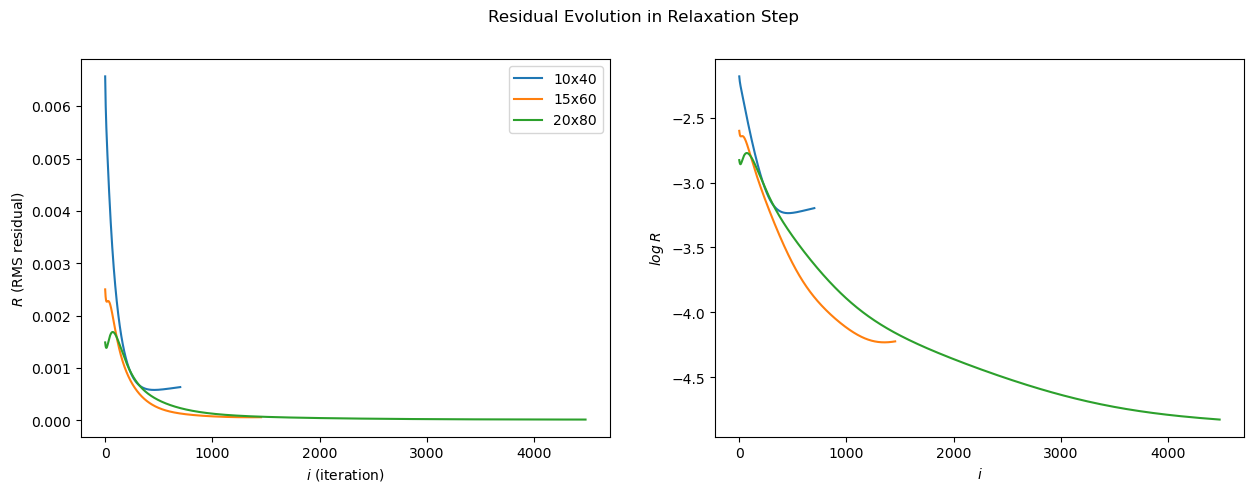

In [2]:
# RESIDUAL EVOLUTION

fig, (ax1, ax2) = plt.subplots(1,2)

entries = [
	[np.genfromtxt('residuals_ellipsoid_10x40.csv', delimiter=','), '10x40'],
	[np.genfromtxt('residuals_ellipsoid_15x60.csv', delimiter=','), '15x60'],
	[np.genfromtxt('residuals_ellipsoid_20x80.csv', delimiter=','), '20x80'],
	# [np.genfromtxt('residuals_ellipsoid_25x100.csv', delimiter=','), '25x100'],
	# [np.genfromtxt('residuals_ellipsoid_30x120.csv', delimiter=','), '30x120'],
	# [np.genfromtxt('residuals_ellipsoid_35x140.csv', delimiter=','), '35x140'],
	# [np.genfromtxt('residuals_ellipsoid_40x160.csv', delimiter=','), '40x160'],
	# [np.genfromtxt('residuals_ellipsoid_45x180.csv', delimiter=','), '45x180'],
	# [np.genfromtxt('residuals_ellipsoid_50x200.csv', delimiter=','), '50x200'],
]


for entry in entries:
	i_values = entry[0][:,0]
	residuals = entry[0][:,1]

	label = entry[1]

	# log_i_values = []
	# for i in i_values:
	# 	log_i_values.append(np.log(i) / np.log(10))

	log_residuals = []
	for residual in residuals:
		log_residuals.append(np.log(residual) / np.log(10))

	ax1.plot(i_values, residuals, label = label)
	ax1.set(xlabel='$i$ (iteration)', ylabel='$R$ (RMS residual)')
	

	ax2.plot(i_values, log_residuals, label = label)
	ax2.set(xlabel='$i$', ylabel='$log \; R$')
	# ax2.plot(log_i_values, log_residuals)
	# ax2.set(xlabel='$\log \; i$', ylabel='$\log \; R$')

fig.suptitle('Residual Evolution in Relaxation Step')
fig.set_size_inches(15, 5, forward=True)
fig.set_dpi(100)

ax1.legend()
# ax2.legend()
plt.show()

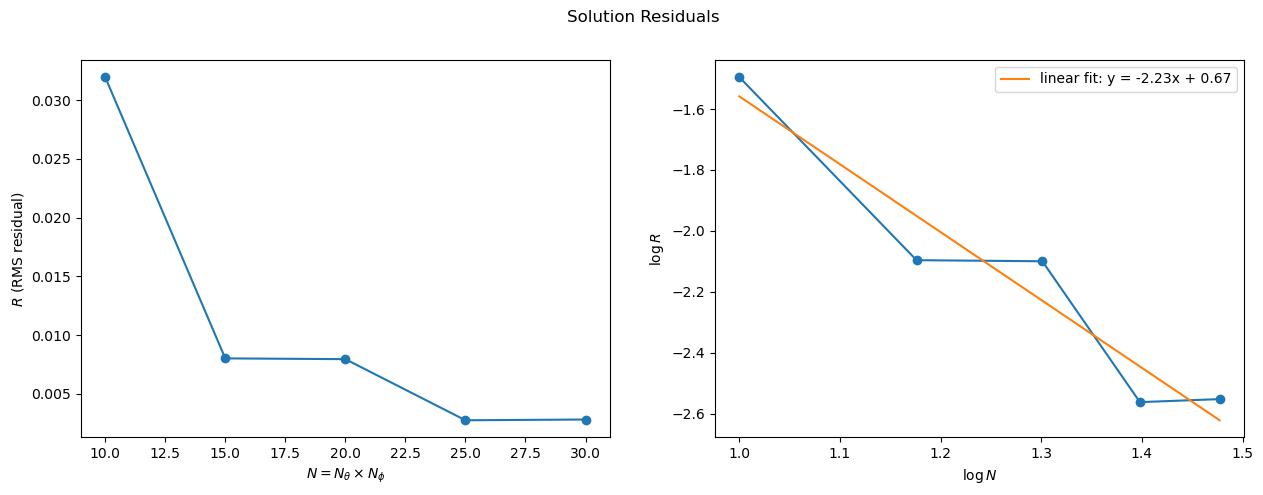

In [6]:
# SOLUTION RESIDUALS (CONVERGENCE TEST)

fig, (ax1, ax2) = plt.subplots(1,2)

entries = np.genfromtxt('solution_residuals.csv', delimiter=',')

N_values = np.array(entries[:,0])
residuals = np.array(entries[:,1])
log_N_values = np.array([])
log_residuals = np.array([])

for N in N_values:
	log_N_values = np.append(log_N_values, np.log(N) / np.log(10))
for residual in residuals:
	log_residuals = np.append(log_residuals, np.log(residual) / np.log(10))

ax1.plot(N_values, residuals, marker='o')
ax1.set(xlabel=r'$N = N_{\theta} \times N_{\phi}$', ylabel=r'$R$ (RMS residual)')

a, b = np.polyfit(log_N_values, log_residuals, 1)
ax2.plot(log_N_values, log_residuals, marker='o')
ax2.plot(log_N_values, a*log_N_values+b, label=f'linear fit: y = {a:.2f}x + {b:.2f}')
ax2.set(xlabel=r'$\log N$', ylabel=r'$\log R$')

fig.suptitle('Solution Residuals')
fig.set_size_inches(15, 5, forward=True)
fig.set_dpi(100)

ax2.legend()
plt.show()

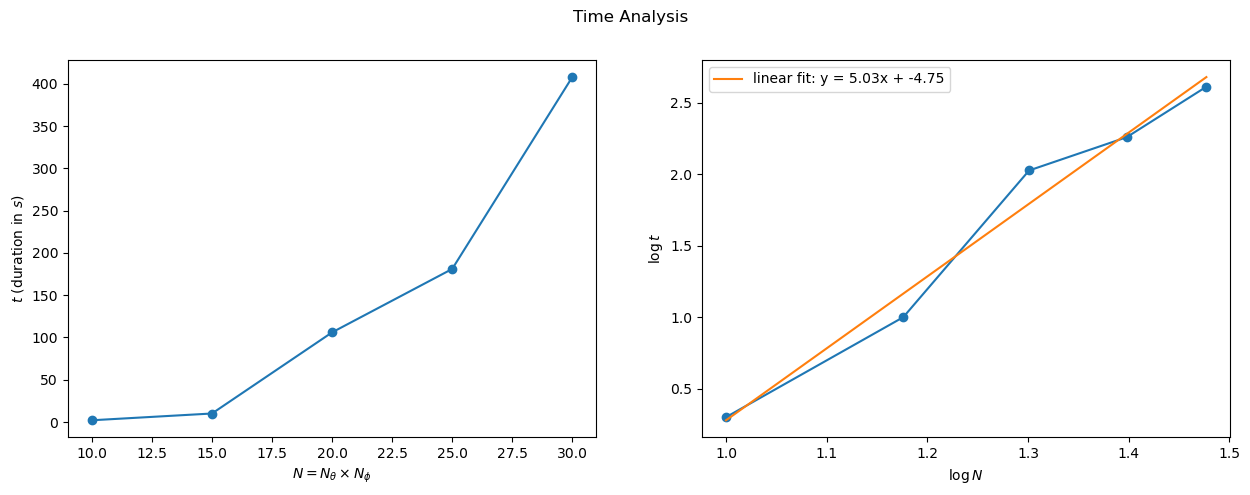

In [5]:
# TIME ANALYSIS

fig, (ax1, ax2) = plt.subplots(1,2)

entries = np.genfromtxt('durations.csv', delimiter=',')

N_values = np.array(entries[:,0])
durations = np.array(entries[:,1])
log_N_values = np.array([])
log_durations = np.array([])

for N in N_values:
	log_N_values = np.append(log_N_values, np.log(N) / np.log(10))
for duration in durations:
	log_durations = np.append(log_durations, np.log(duration) / np.log(10))

ax1.plot(N_values, durations, marker='o')
x = N_values
ax1.set(xlabel=r'$N = N_{\theta} \times N_{\phi}$', ylabel=r'$t$ (duration in $s$)')

a, b = np.polyfit(log_N_values, log_durations, 1)
ax2.plot(log_N_values, log_durations, marker='o')
ax2.plot(log_N_values, a*log_N_values+b, label=f'linear fit: y = {a:.2f}x + {b:.2f}')
ax2.set(xlabel=r'$\log N$', ylabel=r'$\log t$')

fig.suptitle('Time Analysis')
fig.set_size_inches(15, 5, forward=True)
fig.set_dpi(100)

ax2.legend()
plt.show()